In [1]:
import pickle
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

In [2]:
corpus = []
# 读入数据集
with open('generatedComments.txt', 'r', encoding='utf-8') as f:
    for line in f.readlines():
        corpus.append(line.strip('\n'))

In [3]:
corpus

['LN4 ON6 LN5 LN6 ON6 LN11 ON3 LP6 ON6 LP12 CP4 LN9 LN2 CP2 ON4 LN9 CP1 CN1 CP3 LN12 ON5 LN1',
 'CN1 LN1 LN11 LN3 OP6 CN2 LN10 LN2 LN2 CP2 CN3 OP1 CP5 LN8 CN2 OP2 ON2 ON4 LN1',
 'LN11 LN7 ON3 CN2 LN10 LN11 ON1 LN6 LN3 ON4 CN1 LN8 ON5 LN3 ON4 CN1',
 'LN7 ON2 CP6 LN12 ON4 LN7 LN7 ON3 LN3 CP4 LN4 ON4',
 'LP11 LN10 CN5 CN5 CP3 CN2 CN3 LN3 LN7 LN4 LN5 ON2 OP6 CP3 CN1 LN1 LN9 LN8 LN8 OP4 LN12 OP2',
 'OP1 CP2 CP2 LN12 LN2 OP5 CP3 CP6 ON2 LN5 ON2 LN12 ON1 LN1',
 'LN11 CN1 LN11 LN1 ON1 LP9 LN11 OP4 OP6 LN12 CN6 LN8 ON5 LP11 LP9 LN4 LN12',
 'LN8',
 'OP2 LN10 LN7 CN5 LN9 LP3 CP5 LP3 LN6 LP12 OP5 OP3 LN8 LN5 LN11 ON5 OP1 LN9 OP6 LN4 LN5',
 'ON2 LN9 LN12 CN6 LP2 LN11 ON6 LN10',
 'CN2 LN1 LN12 LN9 LN12 LN5 LN9 LN7 LN1 CP3 OP6 CN4 OP4 CP4 LN8 LN4 LN5 CN6 ON3 LN8 CN4 LN4 LP12 LN2',
 'ON3 LN5 LN2 ON1 CP2 LN8 LN10 OP2 LN11 LN11 CP4 LP12 LN7 LN12 LN12',
 'CN5 CP1 LP8 CN4 OP2 LN12 OP4',
 'LN11 CN2 ON5 ON2 LN4 OP2 OP1 LN6 LN4 LN4 LN6 OP2 CP2 LN9',
 'CP3 ON4 LN5 ON2 LN5 LN10 LN2 LN4 CN4 CP3 LN9 CP1 CP1',
 '

In [4]:
# 预处理
# 去除所有 没有评论的数据
while '' in corpus:
    corpus.remove('')
print('Size of Corpus:', len(corpus))

Size of Corpus: 994


In [5]:
corpus

['LN4 ON6 LN5 LN6 ON6 LN11 ON3 LP6 ON6 LP12 CP4 LN9 LN2 CP2 ON4 LN9 CP1 CN1 CP3 LN12 ON5 LN1',
 'CN1 LN1 LN11 LN3 OP6 CN2 LN10 LN2 LN2 CP2 CN3 OP1 CP5 LN8 CN2 OP2 ON2 ON4 LN1',
 'LN11 LN7 ON3 CN2 LN10 LN11 ON1 LN6 LN3 ON4 CN1 LN8 ON5 LN3 ON4 CN1',
 'LN7 ON2 CP6 LN12 ON4 LN7 LN7 ON3 LN3 CP4 LN4 ON4',
 'LP11 LN10 CN5 CN5 CP3 CN2 CN3 LN3 LN7 LN4 LN5 ON2 OP6 CP3 CN1 LN1 LN9 LN8 LN8 OP4 LN12 OP2',
 'OP1 CP2 CP2 LN12 LN2 OP5 CP3 CP6 ON2 LN5 ON2 LN12 ON1 LN1',
 'LN11 CN1 LN11 LN1 ON1 LP9 LN11 OP4 OP6 LN12 CN6 LN8 ON5 LP11 LP9 LN4 LN12',
 'LN8',
 'OP2 LN10 LN7 CN5 LN9 LP3 CP5 LP3 LN6 LP12 OP5 OP3 LN8 LN5 LN11 ON5 OP1 LN9 OP6 LN4 LN5',
 'ON2 LN9 LN12 CN6 LP2 LN11 ON6 LN10',
 'CN2 LN1 LN12 LN9 LN12 LN5 LN9 LN7 LN1 CP3 OP6 CN4 OP4 CP4 LN8 LN4 LN5 CN6 ON3 LN8 CN4 LN4 LP12 LN2',
 'ON3 LN5 LN2 ON1 CP2 LN8 LN10 OP2 LN11 LN11 CP4 LP12 LN7 LN12 LN12',
 'CN5 CP1 LP8 CN4 OP2 LN12 OP4',
 'LN11 CN2 ON5 ON2 LN4 OP2 OP1 LN6 LN4 LN4 LN6 OP2 CP2 LN9',
 'CP3 ON4 LN5 ON2 LN5 LN10 LN2 LN4 CN4 CP3 LN9 CP1 CP1',
 '

In [6]:
# 由于 word2vec 要求数据有 lists of list 的形式
corpus_lists = []
for i in corpus:
    corpus_lists.append(i.split(' '))
corpus_lists

[['LN4',
  'ON6',
  'LN5',
  'LN6',
  'ON6',
  'LN11',
  'ON3',
  'LP6',
  'ON6',
  'LP12',
  'CP4',
  'LN9',
  'LN2',
  'CP2',
  'ON4',
  'LN9',
  'CP1',
  'CN1',
  'CP3',
  'LN12',
  'ON5',
  'LN1'],
 ['CN1',
  'LN1',
  'LN11',
  'LN3',
  'OP6',
  'CN2',
  'LN10',
  'LN2',
  'LN2',
  'CP2',
  'CN3',
  'OP1',
  'CP5',
  'LN8',
  'CN2',
  'OP2',
  'ON2',
  'ON4',
  'LN1'],
 ['LN11',
  'LN7',
  'ON3',
  'CN2',
  'LN10',
  'LN11',
  'ON1',
  'LN6',
  'LN3',
  'ON4',
  'CN1',
  'LN8',
  'ON5',
  'LN3',
  'ON4',
  'CN1'],
 ['LN7',
  'ON2',
  'CP6',
  'LN12',
  'ON4',
  'LN7',
  'LN7',
  'ON3',
  'LN3',
  'CP4',
  'LN4',
  'ON4'],
 ['LP11',
  'LN10',
  'CN5',
  'CN5',
  'CP3',
  'CN2',
  'CN3',
  'LN3',
  'LN7',
  'LN4',
  'LN5',
  'ON2',
  'OP6',
  'CP3',
  'CN1',
  'LN1',
  'LN9',
  'LN8',
  'LN8',
  'OP4',
  'LN12',
  'OP2'],
 ['OP1',
  'CP2',
  'CP2',
  'LN12',
  'LN2',
  'OP5',
  'CP3',
  'CP6',
  'ON2',
  'LN5',
  'ON2',
  'LN12',
  'ON1',
  'LN1'],
 ['LN11',
  'CN1',
  'LN11',
  'LN1

In [36]:
# 统计所有出现过的 Comments
comments = []
for current_essay in corpus_lists:
    for current_comment in current_essay:
        comments.append(current_comment)

comments = list(set(comments))
comments

['LN3',
 'ON2',
 'LP1',
 'LN10',
 'CP4',
 'OP6',
 'LP11',
 'ON3',
 'LP6',
 'OP3',
 'LP7',
 'LP10',
 'LN9',
 'LP8',
 'CN1',
 'CP3',
 'ON6',
 'CN2',
 'CP5',
 'LN7',
 'ON1',
 'CN3',
 'LP3',
 'LN1',
 'LP4',
 'OP4',
 'LP9',
 'LN6',
 'CP6',
 'OP2',
 'LN12',
 'LN8',
 'LP5',
 'CP2',
 'OP1',
 'CP1',
 'ON4',
 'CN5',
 'ON5',
 'LN5',
 'OP5',
 'LP12',
 'LN2',
 'CN4',
 'LP2',
 'CN6',
 'LN4',
 'LN11']

In [7]:
# 训练模型
vectorizer_w2v = Word2Vec(corpus_lists, min_count=1, vector_size=50, workers=3, window=3, sg=1)

In [25]:
# 输出 LN11 的 vector
vectorizer_w2v.wv.get_vector('LN11')

array([-0.03941624, -0.0382163 ,  0.07468399,  0.05770961, -0.05457412,
       -0.16965911,  0.21902741,  0.18778723, -0.1707093 , -0.21084692,
       -0.06731446, -0.25737584,  0.14590774,  0.0395758 , -0.01731306,
        0.20200686,  0.2890112 ,  0.29185605, -0.19841479, -0.29724514,
        0.16686563,  0.25804943,  0.37022597, -0.00959967,  0.06883503,
        0.22843732, -0.01926919,  0.1661957 , -0.08111722, -0.02783887,
       -0.06572373, -0.14631127,  0.03336561, -0.14242211, -0.13537888,
        0.02710334,  0.1732018 , -0.04764323, -0.01868216,  0.08331708,
        0.37031963, -0.0656815 , -0.06358801,  0.11732508,  0.3409251 ,
        0.03675102, -0.08496404, -0.15215228,  0.14180352,  0.18590105],
      dtype=float32)

In [50]:
# 寻找 10 个与 LN11 最相似的 vectors
vectorizer_w2v.wv.most_similar('LN11')[:10]

[('OP1', 0.9963138103485107),
 ('LP10', 0.9961788654327393),
 ('LN9', 0.9961070418357849),
 ('LP8', 0.996036946773529),
 ('LP6', 0.9959076046943665),
 ('LN8', 0.9959012269973755),
 ('LN1', 0.9958027005195618),
 ('CN4', 0.9957366585731506),
 ('ON2', 0.9956941604614258),
 ('LN12', 0.9956847429275513)]

In [38]:
all_vectors = []
for current_comment in comments:
    all_vectors.append(vectorizer_w2v.wv.get_vector(current_comment))

all_vectors

c:\Users\yising\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\yising\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


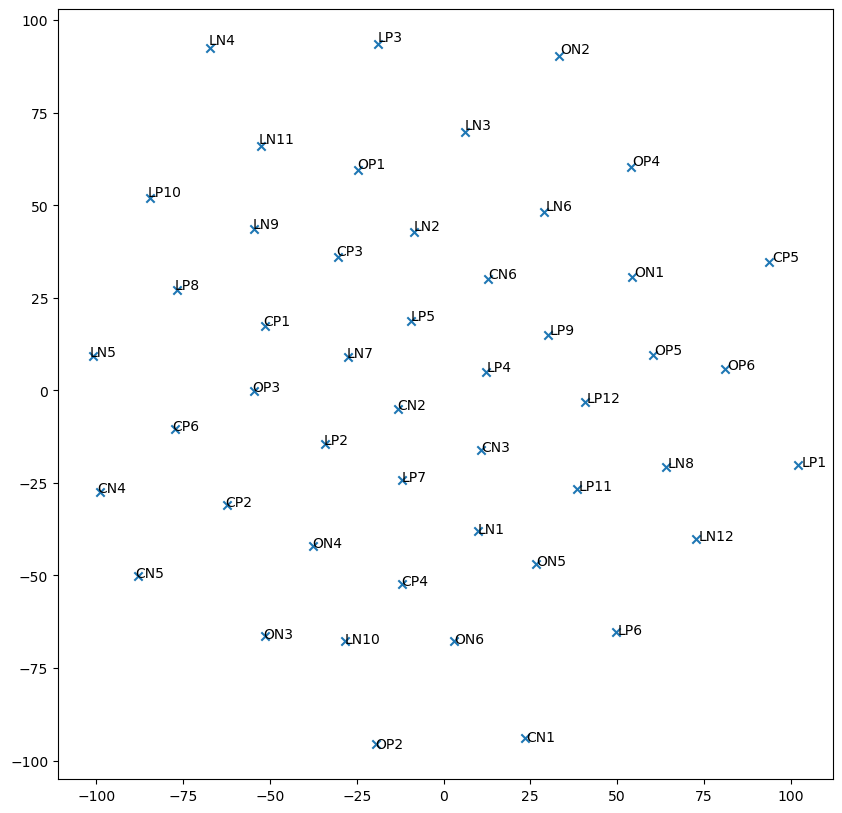

In [52]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# 画散点图之前，首先用 TSNE 降维
tsne = TSNE(n_components=2)
decomposition_data = tsne.fit_transform(all_vectors)
x = []
y = []
for i in decomposition_data:
    x.append(i[0])
    y.append(i[1])

fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
plt.scatter(x, y, marker='x')
for i in range(len(x)):
    plt.text(x[i] * 1.01, y[i] * 1.01, comments[i], fontsize=10)
plt.show()

In [14]:
from pprint import pprint

# 寻找与目标文章（利用 comments 序列标记）相似的文章
target_essay = 'CN4 CN1 CN6 CP2 ON1 LN1 OP1 ON3 LN5 LN1 LN12 ON3 CP2 LN6 LN9 LN11 ON3 LN11 LN8 OP2 CP4'

# 构造 target_essay 与所有 essays 之间的相似度矩阵 essays_similarity（利用 n_similarity）
essays_similarity = np.zeros(len(corpus))
target_essay_comments = [w for w in target_essay.split()]
for index, essay in enumerate(corpus):
    current_essay_comments = [w for w in essay.split()]
    sim = vectorizer_w2v.wv.n_similarity(target_essay_comments, current_essay_comments)
    essays_similarity[index] = sim

res = list(zip(essays_similarity, corpus))
res.sort(key=lambda item:item[0], reverse=True)
print('Target:', target_essay)
pprint(res)

Target: CN4 CN1 CN6 CP2 ON1 LN1 OP1 ON3 LN5 LN1 LN12 ON3 CP2 LN6 LN9 LN11 ON3 LN11 LN8 OP2 CP4
[(1.0,
  'CN4 CN1 CN6 CP2 ON1 LN1 OP1 ON3 LN5 LN1 LN12 ON3 CP2 LN6 LN9 LN11 ON3 LN11 '
  'LN8 OP2 CP4'),
 (0.9998838901519775,
  'CP1 CP1 LN1 LN10 ON1 LN11 LN12 OP1 LN11 LN11 LN9 CP3 LN7 CP5 LN1 CN1 CN4 '
  'LN8 OP5 ON6 ON3 LN10 OP6'),
 (0.9998762011528015,
  'LN9 CP2 LN10 LN9 CN5 CP2 OP3 LN12 LN4 LN2 OP1 ON3 CN1 LN11 CN1 ON1 LN2 LN1'),
 (0.9998713731765747,
  'ON5 CP2 LN10 ON3 LN10 LN5 LN6 LN8 LN9 LN3 ON2 CP2 LN11 CN1'),
 (0.9998654127120972,
  'ON3 LN5 LN2 ON1 CP2 LN8 LN10 OP2 LN11 LN11 CP4 LP12 LN7 LN12 LN12'),
 (0.9998639822006226,
  'LN11 LN2 CN6 LN5 LN1 LN1 LN5 ON3 LN1 LN9 ON4 ON5 CN4 CP1 LN12 LP10 CN5 LN9 '
  'OP6 ON2 LN2'),
 (0.9998631477355957,
  'ON1 LN11 LN9 OP1 ON4 ON3 LN11 LN8 LN5 ON3 LN9 LN8 LN10 CN1 CN2 LN9 LN12 OP6 '
  'CP4 LN3'),
 (0.9998595714569092,
  'LN7 LN12 ON6 OP3 ON3 OP1 LN1 LN10 LP1 LN8 ON3 LN1 LP1 LN9 OP4'),
 (0.9998551607131958, 'LN8 CN6 LN9 ON1 LN10 CP6 LN11 LN9 L